In [62]:
import function as f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import os
import seaborn as sns

In [63]:
folder_path = 'Results'
y_col = ['C_max_prev', 'C_max_now', 'C_max', 'Congestion_ratio_AVG', 'Congestion_ratio_AVG_prev', 'Congestion_ratio_AVG_now']

original_df = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier = y_col[2])

original_df = f.to_numeric(original_df, y_col[0])
original_df = f.to_numeric(original_df, y_col[1])
original_df = f.to_numeric(original_df, y_col[3])
original_df_30s = f.to_numeric(original_df, y_col[4])
original_df = f.to_numeric(original_df, y_col[5])

for file_name, df in original_df:
    # add column
    df['Number of YT'] = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])

all_alpha_df = pd.DataFrame()

# original_df에 있는 모든 파일을 합쳐 하나의 df로 만들기
for file_name, df in original_df:
    all_alpha_df = pd.concat([all_alpha_df, df], ignore_index=True)

all_alpha_df

Remove outliers by  C_max !


,Prev Truck Number,Now Truck Number,alpha_1,alpha_2,alpha_3,repeat_num,C_max_prev,C_max_now,C_max,Congestion_ratio_AVG,Congestion_ratio_AVG_prev,Congestion_ratio_AVG_now,Number of YT
0,5,5,0,0,100,1,404.816,396.952,404.816,0.036557,0.034676,0.038438,10
1,5,5,0,0,100,2,430.392,389.856,430.392,0.031613,0.046885,0.016342,10
2,5,5,0,0,100,3,395.136,403.208,403.208,0.047560,0.038560,0.056561,10
3,5,5,0,0,100,4,379.360,406.512,406.512,0.076458,0.058949,0.093967,10
4,5,5,0,0,100,5,367.512,419.168,419.168,0.023216,-0.013357,0.059789,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,30,30,80,10,10,56,441.536,448.848,448.848,0.286701,0.330823,0.242578,60
5754,30,30,80,10,10,57,429.856,444.728,444.728,0.332213,0.238609,0.425816,60
5755,30,30,80,10,10,58,433.640,446.616,446.616,0.371354,0.450646,0.292061,60
5756,30,30,80,10,10,59,451.176,440.272,451.176,0.260300,0.284196,0.236405,60


In [64]:
all_alpha2_0_df = all_alpha_df[(all_alpha_df['alpha_2'] == 0) & (all_alpha_df['Number of YT'] >= 30)]
all_alpha2_80_df = all_alpha_df[(all_alpha_df['alpha_2'] == 80) & (all_alpha_df['Number of YT'] >= 30)]

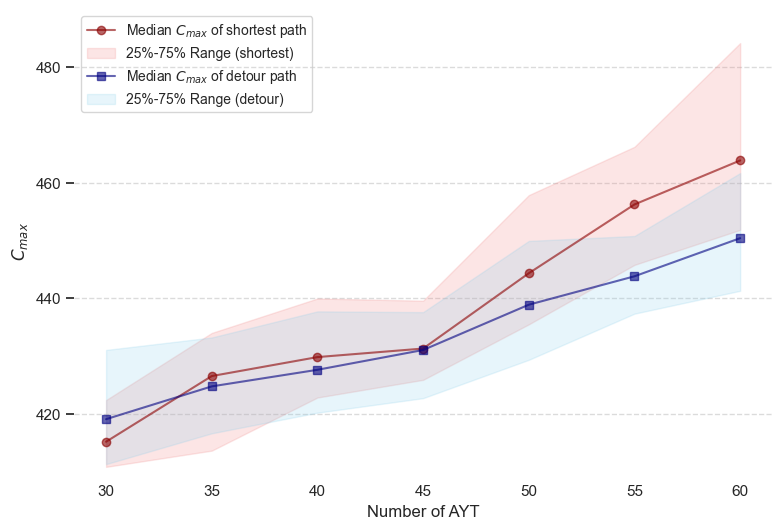

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 프레임
df_0 = all_alpha2_0_df
df_80 = all_alpha2_80_df

# 그래프 크기 설정
plt.figure(figsize=(9, 6))

# YT 수에 따른 C_max 값의 중앙값 및 상/하위 25%의 백분위수 계산 (all_alpha2_0_df)
median_c_max_0 = df_0.groupby('Number of YT')['C_max'].median().reset_index()
lower_quantile_c_max_0 = df_0.groupby('Number of YT')['C_max'].quantile(0.25).reset_index()
upper_quantile_c_max_0 = df_0.groupby('Number of YT')['C_max'].quantile(0.75).reset_index()

# 중앙값에 대한 꺾은선 그래프
plt.plot(median_c_max_0['Number of YT'], median_c_max_0['C_max'], marker='o', linestyle='-', color='darkred', label='Median $C_{max}$ of shortest path', alpha=0.6)

# 상/하위 25%의 백분위수에 대한 음영 영역 표시
plt.fill_between(lower_quantile_c_max_0['Number of YT'], lower_quantile_c_max_0['C_max'], upper_quantile_c_max_0['C_max'], alpha=0.2, color='lightcoral', label='25%-75% Range (shortest)')

# YT 수에 따른 C_max 값의 중앙값 및 상/하위 25%의 백분위수 계산 (all_alpha2_80_df)
median_c_max_80 = df_80.groupby('Number of YT')['C_max'].median().reset_index()
lower_quantile_c_max_80 = df_80.groupby('Number of YT')['C_max'].quantile(0.25).reset_index()
upper_quantile_c_max_80 = df_80.groupby('Number of YT')['C_max'].quantile(0.75).reset_index()

# 중앙값에 대한 꺾은선 그래프
plt.plot(median_c_max_80['Number of YT'], median_c_max_80['C_max'], marker='s', linestyle='-', color='navy', label='Median $C_{max}$ of detour path', alpha=0.6)

# 상/하위 25%의 백분위수에 대한 음영 영역 표시
plt.fill_between(lower_quantile_c_max_80['Number of YT'], lower_quantile_c_max_80['C_max'], upper_quantile_c_max_80['C_max'], alpha=0.2, color='skyblue', label='25%-75% Range (detour)')

# 배경을 투명하게 설정
plt.gca().set_facecolor('none')

# X축 눈금선 및 테두리 제거
plt.tick_params(axis='x', which='both', bottom=False, top=False)  # X축 눈금선 비활성화
plt.box(on=None)  # 테두리 비활성화

# X축과 Y축 레이블 설정
plt.xlabel('Number of AYT')
plt.ylabel('$C_{max}$')
plt.ylim(410, 490)

# y축 420부터 20단위로 눈금선 추가
plt.yticks(np.arange(420, 490, 20))

# Y축 눈금선 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 범례 좌상단에 위치, 배경 투명하게 설정
plt.legend(loc='upper left', fontsize=10, facecolor='none')

# 그래프 표시
plt.show()


In [66]:
df  = all_alpha_df.copy()

# 'Number of YT'에 따라 데이터 분리하고, 'alpha_1', 'alpha_2', 'alpha_3'의 값이 같은 행끼리 묶은 뒤, 'Congestion_ratio_AVG'의 평균 계산
congestion_ratio_avg = df.groupby(['Number of YT', 'alpha_1', 'alpha_2', 'alpha_3'])['Congestion_ratio_AVG'].mean().reset_index()

C_max_avg = df.groupby(['Number of YT', 'alpha_1', 'alpha_2', 'alpha_3'])['C_max'].mean().reset_index()
C_max_prev_avg = df.groupby(['Number of YT', 'alpha_1', 'alpha_2', 'alpha_3'])['C_max_prev'].mean().reset_index()
C_max_now_avg = df.groupby(['Number of YT', 'alpha_1', 'alpha_2', 'alpha_3'])['C_max_now'].mean().reset_index()

# 결과 출력
C_max_avg

,Number of YT,alpha_1,alpha_2,alpha_3,C_max
0,10,0,0,100,407.322621
1,10,10,80,10,411.559714
2,10,20,70,10,409.148000
3,10,30,60,10,409.195649
4,10,40,50,10,409.341614
...,...,...,...,...,...
94,60,40,50,10,457.241846
95,60,50,40,10,453.213647
96,60,60,30,10,462.663709
97,60,70,20,10,459.559852


In [67]:
# Number of YT가 40이상인 데이터만 남기기
C_max_avg = C_max_avg[C_max_avg['Number of YT'] >= 40]

C_max_avg.head()

,Number of YT,alpha_1,alpha_2,alpha_3,C_max
54,40,0,0,100,432.069527
55,40,10,80,10,428.777898
56,40,20,70,10,429.691345
57,40,30,60,10,427.945926
58,40,40,50,10,429.780070


In [68]:
# Create a pivot table
C_max_pivot_table = pd.pivot_table(C_max_avg, values='C_max',
                              index='Number of YT', columns='alpha_2')

# 백분율로 변환, 소수점 2자리에서 반올림
# pivot_table = pivot_table * 100
C_max_pivot_table = C_max_pivot_table.round(2)

# Display the pivot table
print(C_max_pivot_table)

alpha_2           0       10      20      30      40      50      60      70  \
Number of YT                                                                   
40            432.07  429.69  429.99  428.91  430.28  429.78  427.95  429.69   
45            433.98  434.91  432.94  435.17  435.46  435.11  433.81  432.82   
50            445.57  442.71  437.93  440.10  444.40  443.77  443.30  442.23   
55            456.52  448.73  448.01  446.22  448.40  454.60  449.42  448.07   
60            469.09  458.09  459.56  462.66  453.21  457.24  453.67  454.23   

alpha_2           80  
Number of YT          
40            428.78  
45            431.26  
50            440.09  
55            445.27  
60            454.30  


In [69]:
# fill value that is the difference percentage (Gap) between the alpah_2 is 0 and except alpha_2 is 0
gap_tb = C_max_pivot_table.iloc[:, 1:].apply(lambda x: ( C_max_pivot_table.iloc[:, 0] - x)/C_max_pivot_table.iloc[:,0]* 100)
gap_tb

alpha_2,10,20,30,40,50,60,70,80
Number of YT,,,,,,,,
40,0.550837,0.481403,0.731363,0.414285,0.530007,0.953549,0.550837,0.761451
45,-0.214296,0.239642,-0.274206,-0.341030,-0.260381,0.039172,0.267293,0.626757
50,0.641874,1.714658,1.227641,0.262585,0.403977,0.509460,0.749602,1.229885
55,1.706387,1.864102,2.256199,1.778673,0.420573,1.555244,1.850959,2.464295
60,2.344966,2.031593,1.370739,3.385278,2.526168,3.287216,3.167836,3.152913


In [70]:
# save to csv file
gap_tb.to_csv('gap_tb.csv')

In [71]:
# Add Column Gap(%) and Gap is the difference percentage between the alpah_2 is 0 and alpha_2 is not 0 and minimum value of each row
C_max_pivot_table['Gap(%)'] = (C_max_pivot_table[0] - C_max_pivot_table.min(axis=1)) / C_max_pivot_table[0] * 100
C_max_pivot_table

alpha_2,0,10,20,30,40,50,60,70,80,Gap(%)
Number of YT,,,,,,,,,,
40,432.07,429.69,429.99,428.91,430.28,429.78,427.95,429.69,428.78,0.953549
45,433.98,434.91,432.94,435.17,435.46,435.11,433.81,432.82,431.26,0.626757
50,445.57,442.71,437.93,440.10,444.40,443.77,443.30,442.23,440.09,1.714658
55,456.52,448.73,448.01,446.22,448.40,454.60,449.42,448.07,445.27,2.464295
60,469.09,458.09,459.56,462.66,453.21,457.24,453.67,454.23,454.30,3.385278


In [72]:
# save to csv
C_max_pivot_table.to_csv('C_max_table.csv')

c:\Users\USER\anaconda3\envs\hyeooi\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


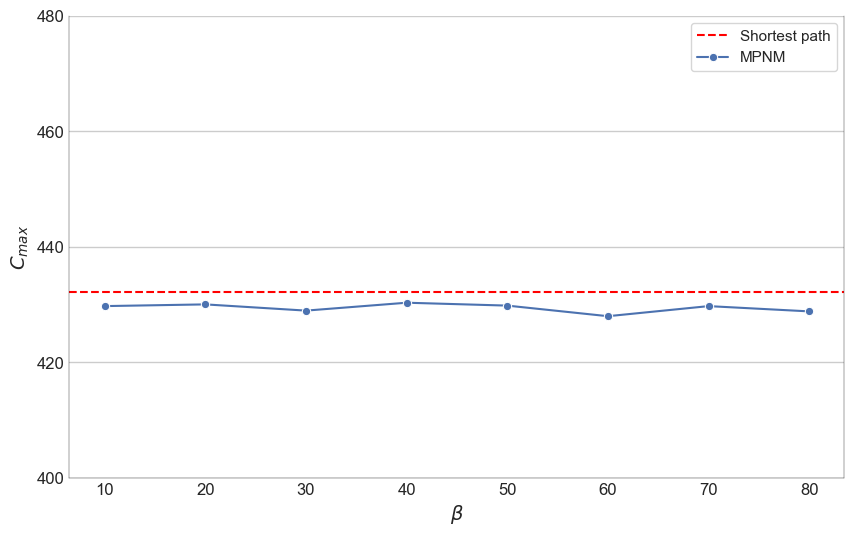

In [73]:
C_max_df_40s = pd.DataFrame(C_max_avg[(C_max_avg['Number of YT'] == 40)])
C_max_df_60s = pd.DataFrame(C_max_avg[(C_max_avg['Number of YT'] == 60)])

# C_max_df_40s


# Separate data for alpha_2=0, 0, 100 and other values
C_max_df_40s_ref = C_max_df_40s[C_max_df_40s['alpha_2'] == 0]
C_max_df_40s_other = C_max_df_40s[C_max_df_40s['alpha_2'] != 0]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot horizontal reference line for alpha (0, 0, 100)
plt.axhline(y=C_max_df_40s_ref['C_max'].iloc[0], color='red', linestyle='--', label='Shortest path')

# Plotting other alpha values with viridis color map
sns.lineplot(x='alpha_2', y='C_max', data=C_max_df_40s_other, marker='o', linestyle='-', label='MPNM', ax=ax, palette='viridis')

# Adding labels and title
plt.xlabel(r"$\beta$", fontsize=14)
plt.ylabel('$C_{max}$', fontsize=14)
# plt.title('Average of C_max for 40 YTs')
plt.yticks(np.arange(400, 500, 20))

ax.tick_params(axis='both', which='both', length=0, labelsize=12)

# Adding grid and legend
plt.grid(True)
plt.legend()

# Setting spine widths
ax.spines['bottom'].set_linewidth(0.3)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0.3)
ax.spines['left'].set_linewidth(0.3)
ax.xaxis.grid(False)

# Display the plot
plt.show()


c:\Users\USER\anaconda3\envs\hyeooi\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  if sys.path[0] == "":


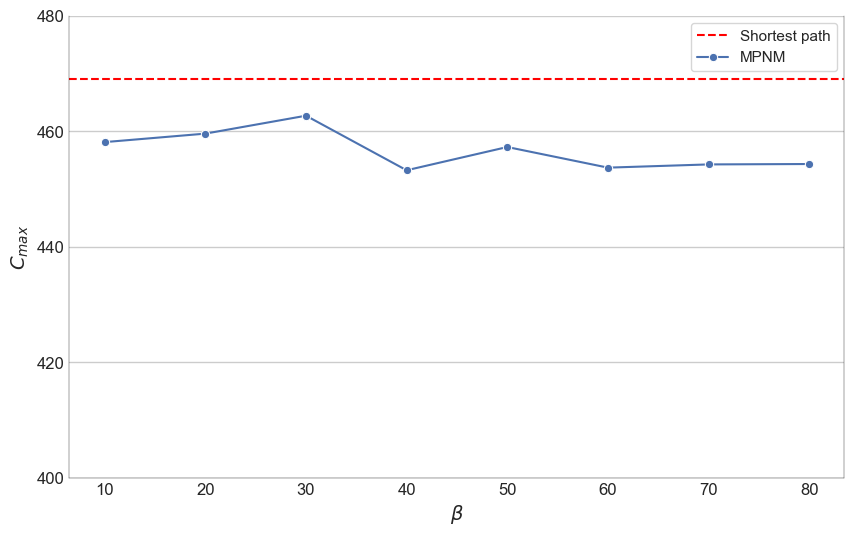

In [74]:
# Separate data for alpha_2=0, 0, 100 and other values
C_max_df_60s_ref = C_max_df_60s[C_max_df_60s['alpha_2'] == 0]
C_max_df_60s_other = C_max_df_60s[C_max_df_60s['alpha_2'] != 0]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot horizontal reference line for alpha (0, 0, 100)
plt.axhline(y=C_max_df_60s_ref['C_max'].iloc[0], color='red', linestyle='--', label='Shortest path')

# Plotting other alpha values with viridis color map
sns.lineplot(x='alpha_2', y='C_max', data=C_max_df_60s_other, marker='o', linestyle='-', label='MPNM', ax=ax, palette='viridis')

# Adding labels and title
plt.xlabel(r"$\beta$", fontsize=14)
plt.ylabel('$C_{max}$',  fontsize=14)
# plt.title('Average of C_max for 60 YTs')
plt.yticks(np.arange(400, 500, 20))

# Adding grid and legend
plt.grid(True)
plt.legend()

ax.tick_params(axis='both', which='both', length=0, labelsize=12)


# Setting spine widths
ax.spines['bottom'].set_linewidth(0.3)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0.3)
ax.spines['left'].set_linewidth(0.3)
ax.xaxis.grid(False)

# Display the plot
plt.show()

In [75]:
# Number of YT가 40이상인 데이터만 남기기
congestion_ratio_avg_over40 = congestion_ratio_avg[congestion_ratio_avg['Number of YT'] >= 40]

# alpha_2값이 

congestion_ratio_avg_over40

,Number of YT,alpha_1,alpha_2,alpha_3,Congestion_ratio_AVG
54,40,0,0,100,0.184997
55,40,10,80,10,0.140230
56,40,20,70,10,0.142909
57,40,30,60,10,0.144637
58,40,40,50,10,0.155796
59,40,50,40,10,0.157371
60,40,60,30,10,0.159659
61,40,70,20,10,0.158979
62,40,80,10,10,0.158733
63,45,0,0,100,0.218356


In [76]:
# Create a pivot table
pivot_table = pd.pivot_table(congestion_ratio_avg_over40, values='Congestion_ratio_AVG',
                              index='Number of YT', columns='alpha_2', aggfunc=np.mean)

# 백분율로 변환, 소수점 2자리에서 반올림
# pivot_table = pivot_table * 100
pivot_table = pivot_table.round(2)

# Display the pivot table
print(pivot_table)

alpha_2         0     10    20    30    40    50    60    70    80
Number of YT                                                      
40            0.18  0.16  0.16  0.16  0.16  0.16  0.14  0.14  0.14
45            0.22  0.19  0.19  0.20  0.20  0.20  0.19  0.18  0.17
50            0.27  0.25  0.24  0.24  0.25  0.25  0.24  0.23  0.21
55            0.34  0.29  0.30  0.29  0.30  0.30  0.28  0.27  0.24
60            0.42  0.34  0.36  0.36  0.34  0.35  0.33  0.32  0.30


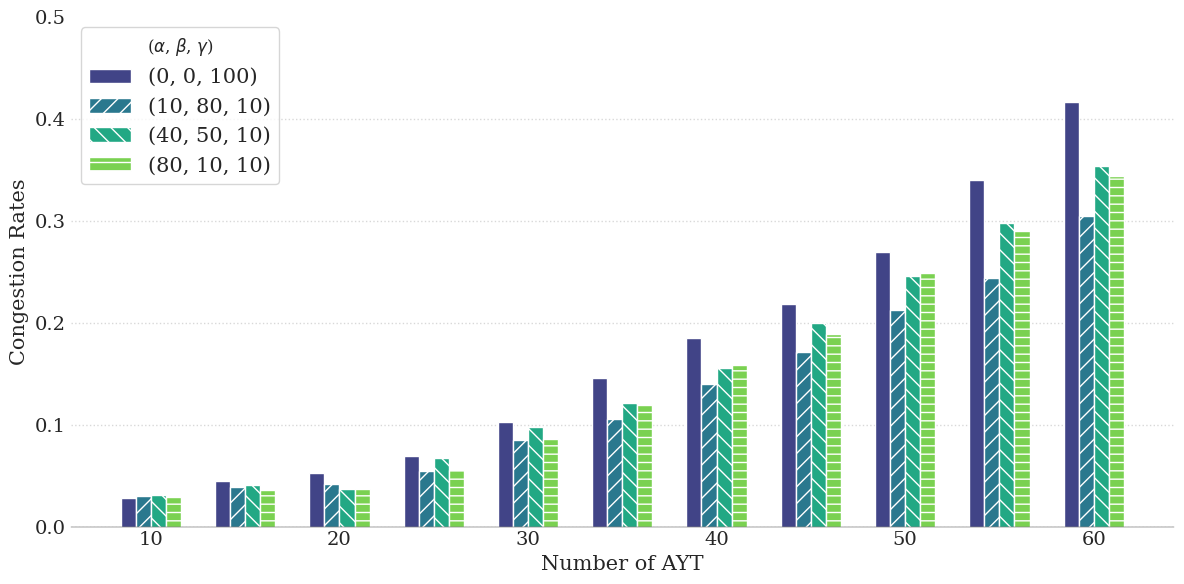

In [77]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font style to a more suitable one for academic writing
plt.rcParams['font.family'] = 'serif'

# Copy the DataFrame
df = congestion_ratio_avg.copy()

# Define alpha values
alpha_values = [[0, 10, 40, 80],
                [0, 80, 50, 10],
                [100, 10, 10, 10]]

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 6))

# Use seaborn's color palette
colors = sns.color_palette("viridis", n_colors=len(alpha_values[0]))

# Define hatch patterns
hatch_patterns = ['', '//', '\\\\', '--']

# Set the width of each bar
bar_width = 0.8

# Loop through alpha values and plot each set of bars
for i, (alpha_1, alpha_2, alpha_3) in enumerate(zip(*alpha_values)):
    # Filter rows based on the current alpha values
    filtered_df = df[(df['alpha_1'] == alpha_1) & (df['alpha_2'] == alpha_2) & (df['alpha_3'] == alpha_3)]
    
    # Calculate the x-axis positions for each bar
    x_positions = filtered_df['Number of YT'] + (i - (len(alpha_values[0]) - 1) / 2) * bar_width
    
    # Plot the bar for the current alpha combination with hatch pattern
    ax.bar(x_positions, filtered_df['Congestion_ratio_AVG'],
           width=bar_width, label=f'({alpha_1}, {alpha_2}, {alpha_3})', color=colors[i], hatch=hatch_patterns[i])

# Set labels and title
ax.set_xlabel('Number of AYT', fontweight='ultralight', fontsize=15)
ax.set_ylabel('Congestion Rates', fontweight='ultralight', fontsize=15)
# ax.set_title('Congestion Ratio with Different Weights')

# Set y-axis ticks in increments of 0.1
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 0.5)

# Remove both x and y axis ticks
ax.tick_params(axis='both', which='both', length=0, labelsize=14)

# Remove vertical grid lines
ax.xaxis.grid(False)

# Customize y-axis grid lines
ax.yaxis.grid(True, color='gray', linestyle='dotted', alpha=0.3)

# Customize legend font size
ax.legend(title=r"($\alpha$, $\beta$, $\gamma$)", prop={'size': 15})

# Set thinner border lines
ax.spines['bottom'].set_linewidth(0.3)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['left'].set_linewidth(0)

# Remove y-axis grid line at y=0.5
yticks = ax.get_yticks()
ygridlines = ax.get_ygridlines()
for ytick, ygridline in zip(yticks, ygridlines):
    if ytick == 0.5:
        ygridline.set_visible(False)
 
# Show the plot
plt.tight_layout()
plt.show()


In [78]:
df_40s = pd.DataFrame(congestion_ratio_avg[(congestion_ratio_avg['Number of YT'] == 40)])
df_60s = pd.DataFrame(congestion_ratio_avg[(congestion_ratio_avg['Number of YT'] == 60)])

df_40s
# print(df_60s['Congestion_ratio_AVG'])

,Number of YT,alpha_1,alpha_2,alpha_3,Congestion_ratio_AVG
54,40,0,0,100,0.184997
55,40,10,80,10,0.140230
56,40,20,70,10,0.142909
57,40,30,60,10,0.144637
58,40,40,50,10,0.155796
59,40,50,40,10,0.157371
60,40,60,30,10,0.159659
61,40,70,20,10,0.158979
62,40,80,10,10,0.158733


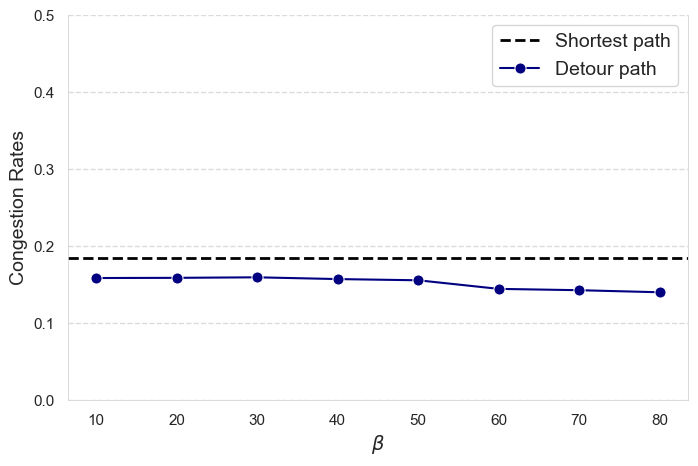

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a stylish seaborn theme
sns.set_theme(style="whitegrid", palette="viridis")

# Extract data for alpha_2=0, 0, 100 and other values
df_40s_ref = df_40s[df_40s['alpha_2'] == 0]
df_40s_other = df_40s[df_40s['alpha_2'] != 0]

# Create a stylish plot
plt.figure(figsize=(8, 5))

# Plot horizontal reference line for alpha (0, 0, 100)
plt.axhline(y=df_40s_ref['Congestion_ratio_AVG'].iloc[0], color='black', linestyle='--', label='Shortest path', linewidth=2)

# Plot other alpha values with a new color (coral)
sns.lineplot(x='alpha_2', y='Congestion_ratio_AVG', data=df_40s_other, marker='o', label='Detour path', color='navy', markersize=8)

# Set labels and title
plt.xlabel(r"$\beta$", fontsize=14)
plt.ylabel('Congestion Rates', fontsize=14)
plt.yticks(np.arange(0, 0.6, 0.1))
# plt.title('Average Congestion Ratio for 40 YTs')

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=14)

# Customize axis spines
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().xaxis.grid(False)

# Display the plot
plt.show()


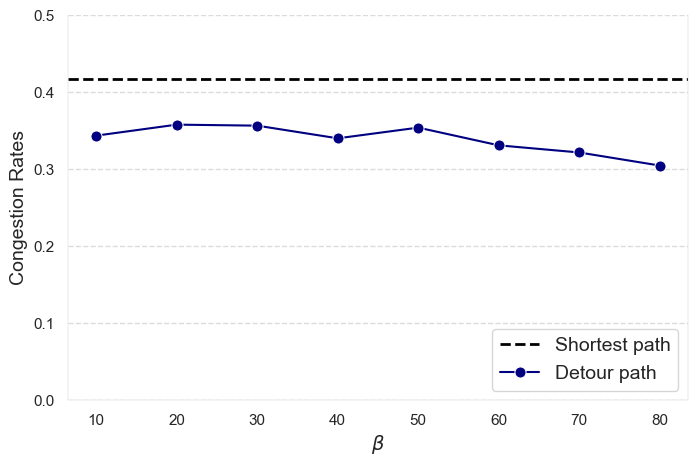

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a stylish seaborn theme
sns.set_theme(style="whitegrid", palette="viridis")

# Separate data for alpha_2=0, 0, 100 and other values
df_60s_ref = df_60s[df_60s['alpha_2'] == 0]
df_60s_other = df_60s[df_60s['alpha_2'] != 0]

# Create a stylish plot
plt.figure(figsize=(8, 5))

# Plot horizontal reference line for alpha (0, 0, 100)
plt.axhline(y=df_60s_ref['Congestion_ratio_AVG'].iloc[0], color='black', linestyle='--', label='Shortest path',linewidth=2)

# Plot other alpha values with different colors and line styles
sns.lineplot(x='alpha_2', y='Congestion_ratio_AVG', data=df_60s_other, marker='o', label='Detour path',color='navy', markersize=8)

# Set labels and title
plt.xlabel(r"$\beta$", fontsize=14)
plt.ylabel('Congestion Rates', fontsize=14)
plt.yticks(np.arange(0, 0.6, 0.1))

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=14, loc='lower right')

# Customize axis spines
plt.gca().spines['bottom'].set_linewidth(0.3)
plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['right'].set_linewidth(0.3)
plt.gca().spines['left'].set_linewidth(0.3)
plt.gca().xaxis.grid(False)

# Display the plot
plt.show()


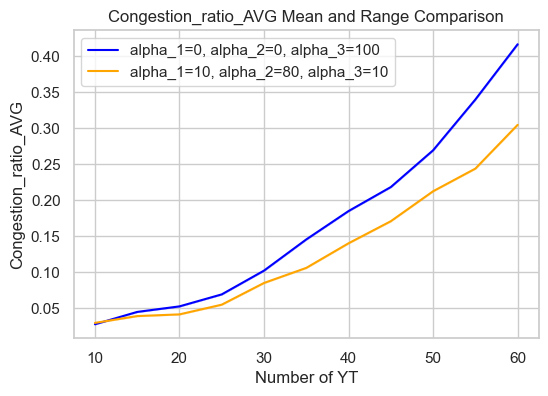

In [81]:
# 필요한 데이터 추출
alpha_1_data = df[(df['alpha_1'] == 0) & (df['alpha_2'] == 0) & (df['alpha_3'] == 100)]
alpha_2_data = df[(df['alpha_1'] == 10) & (df['alpha_2'] == 80) & (df['alpha_3'] == 10)]

# Number of YT별 Congestion_ratio_AVG의 평균값 계산
mean_alpha_1 = alpha_1_data.groupby('Number of YT')['Congestion_ratio_AVG'].mean()
mean_alpha_2 = alpha_2_data.groupby('Number of YT')['Congestion_ratio_AVG'].mean()

# Congestion_ratio_AVG의 최대, 최소값 계산
min_alpha_1 = alpha_1_data.groupby('Number of YT')['Congestion_ratio_AVG'].min()
max_alpha_1 = alpha_1_data.groupby('Number of YT')['Congestion_ratio_AVG'].max()

min_alpha_2 = alpha_2_data.groupby('Number of YT')['Congestion_ratio_AVG'].min()
max_alpha_2 = alpha_2_data.groupby('Number of YT')['Congestion_ratio_AVG'].max()

# 그래프 그리기
plt.figure(figsize=(6, 4))

# 평균값에 대한 라인 플롯
sns.lineplot(x=mean_alpha_1.index, y=mean_alpha_1, label='alpha_1=0, alpha_2=0, alpha_3=100', color='blue')
sns.lineplot(x=mean_alpha_2.index, y=mean_alpha_2, label='alpha_1=10, alpha_2=80, alpha_3=10', color='orange')

# 실제 값의 범위에 대한 그림자 표현
plt.fill_between(mean_alpha_1.index, min_alpha_1, max_alpha_1, color='blue', alpha=0.2)
plt.fill_between(mean_alpha_2.index, min_alpha_2, max_alpha_2, color='orange', alpha=0.2)

# 그래프 제목 및 레이블 설정
plt.title('Congestion_ratio_AVG Mean and Range Comparison')
plt.xlabel('Number of YT')
plt.ylabel('Congestion_ratio_AVG')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = all_alpha_df.copy()


# alpha_1이 0, alpha_2가 0, alpha_3이 100인 행 추출
filtered_data_1 = df[(df['alpha_1'] == 0) & (df['alpha_2'] == 0) & (df['alpha_3'] == 100)]

# alpha_1이 10, alpha_2가 80, alpha_3이 10인 행 추출
filtered_data_2 = df[(df['alpha_1'] == 10) & (df['alpha_2'] == 80) & (df['alpha_3'] == 10)]

# 각각의 데이터에 대해 Number of YT 별로 C_max의 평균 및 분산 계산
grouped_data_1 = filtered_data_1.groupby('Number of YT')['C_max'].agg(['mean', 'std']).reset_index()
grouped_data_2 = filtered_data_2.groupby('Number of YT')['C_max'].agg(['mean', 'std']).reset_index()


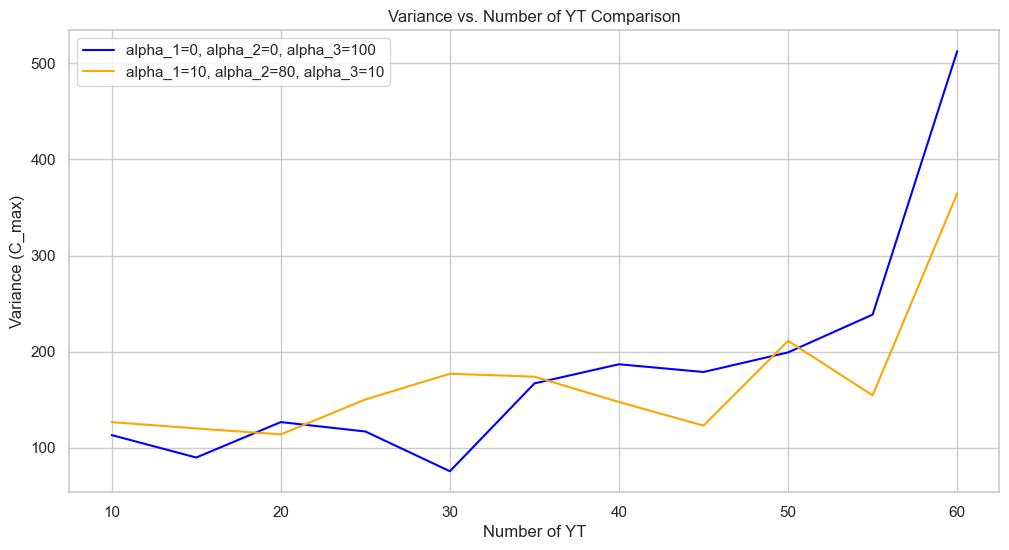

In [83]:
# 두 데이터셋에 대해 Number of YT에 따른 분산 계산
variance_data_1 = filtered_data_1.groupby('Number of YT')['C_max'].var().reset_index()
variance_data_2 = filtered_data_2.groupby('Number of YT')['C_max'].var().reset_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))

plt.plot(variance_data_1['Number of YT'], variance_data_1['C_max'], label='alpha_1=0, alpha_2=0, alpha_3=100', color='blue')
plt.plot(variance_data_2['Number of YT'], variance_data_2['C_max'], label='alpha_1=10, alpha_2=80, alpha_3=10', color='orange')

# 그래프 제목 및 레이블 설정
plt.title('Variance vs. Number of YT Comparison')
plt.xlabel('Number of YT')
plt.ylabel('Variance (C_max)')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


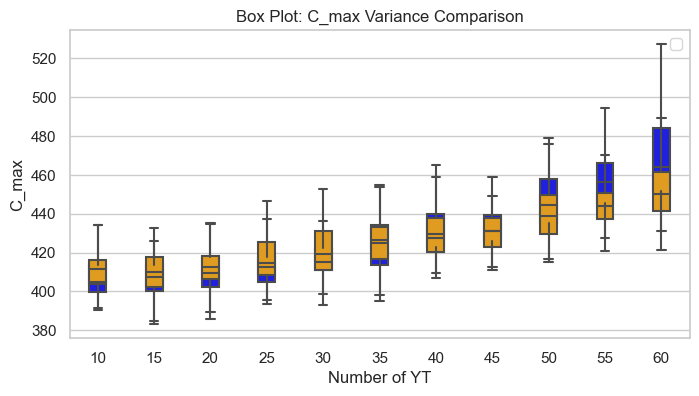

In [84]:
# 그래프 그리기
plt.figure(figsize=(8, 4))

sns.boxplot(x='Number of YT', y='C_max', data=filtered_data_1, color='blue', width=0.3,dodge=True, showfliers=False)
sns.boxplot(x='Number of YT', y='C_max', data=filtered_data_2, color='orange', width=0.3,dodge=True ,showfliers=False)

# 그래프 제목 및 레이블 설정
plt.title('Box Plot: C_max Variance Comparison')
plt.xlabel('Number of YT')
plt.ylabel('C_max')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

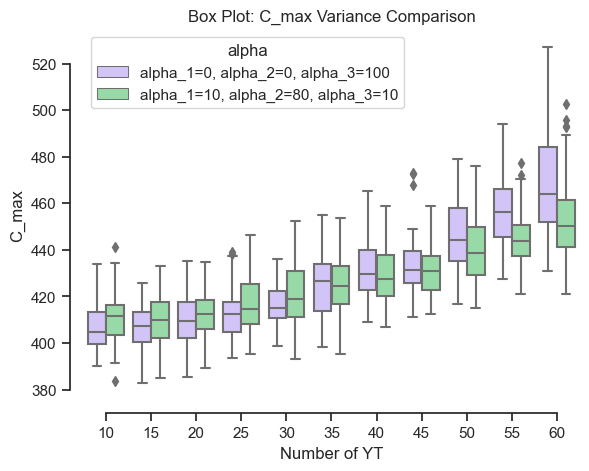

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임이 tips 대신 filtered_data_1과 filtered_data_2를 사용
sns.set_theme(style="ticks", palette="pastel")

# Combine the two datasets for visualization
combined_data = pd.concat([filtered_data_1.assign(alpha='alpha_1=0, alpha_2=0, alpha_3=100'), 
                           filtered_data_2.assign(alpha='alpha_1=10, alpha_2=80, alpha_3=10')])

# Draw a nested boxplot to show C_max by Number of YT and alpha
sns.boxplot(x="Number of YT", y="C_max",
            hue="alpha", palette=["m", "g"],
            data=combined_data)
sns.despine(offset=10, trim=True)

# Set the title and labels
plt.title('Box Plot: C_max Variance Comparison')
plt.xlabel('Number of YT')
plt.ylabel('C_max')

# Show the plot
plt.show()


#
alpha = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
         [0, 80, 70, 60, 50, 40, 30, 20, 10],
         [100, 10, 10, 10, 10, 10, 10, 10, 10]]


In [86]:
# 'Number of YT', 'alpha_1', 'alpha_2', 'alpha_3'가 같은 행끼리 묶은 뒤, 'C_max'의 표준편차 계산
std_dev_by_group = all_alpha_df.groupby(['Number of YT', 'alpha_1', 'alpha_2', 'alpha_3'])['C_max'].std().reset_index()

# C_max를 C_max의 표준편차로 열 이름 변경
std_dev_by_group.rename(columns={'C_max': 'C_max_std'}, inplace=True)

# 결과 출력
std_dev_by_group

,Number of YT,alpha_1,alpha_2,alpha_3,C_max_std
0,10,0,0,100,10.640166
1,10,10,80,10,11.257528
2,10,20,70,10,8.194852
3,10,30,60,10,10.545705
4,10,40,50,10,10.937548
...,...,...,...,...,...
94,60,40,50,10,14.319800
95,60,50,40,10,12.777979
96,60,60,30,10,22.412262
97,60,70,20,10,20.236408


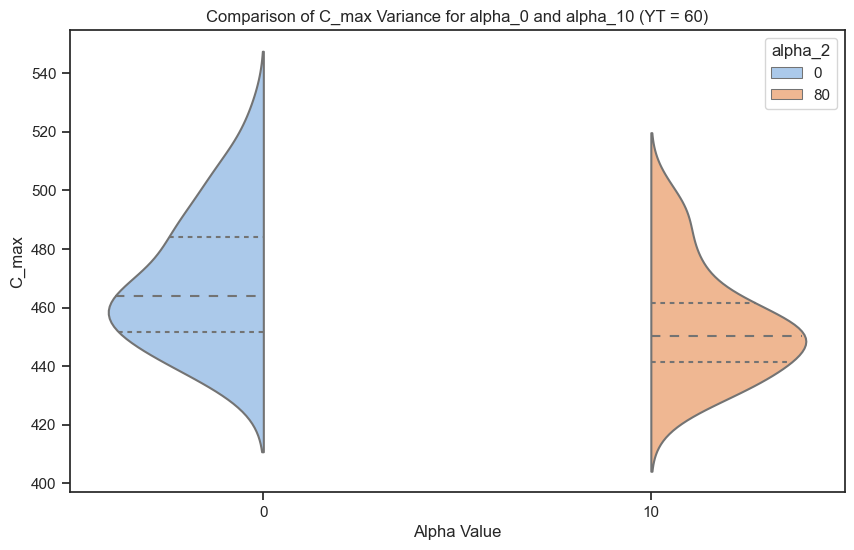

In [87]:
# 알파값이 0, 0, 100과 10, 80, 10인 경우의 데이터 추출
alpha_0_data = all_alpha_df[(all_alpha_df['alpha_1'] == 0) & (all_alpha_df['alpha_2'] == 0) & (all_alpha_df['alpha_3'] == 100) & (all_alpha_df['Number of YT'] == 60)]
alpha_10_data = all_alpha_df[(all_alpha_df['alpha_1'] == 10) & (all_alpha_df['alpha_2'] == 80) & (all_alpha_df['alpha_3'] == 10) & (all_alpha_df['Number of YT'] == 60)]

# 바이올린 플롯 그리기
plt.figure(figsize=(10, 6))
sns.violinplot(x='alpha_1', y='C_max', data=pd.concat([alpha_0_data, alpha_10_data]), hue='alpha_2', split=True, inner='quartile')
plt.title('Comparison of C_max Variance for alpha_0 and alpha_10 (YT = 60)')
plt.xlabel('Alpha Value')
plt.ylabel('C_max')
plt.show()

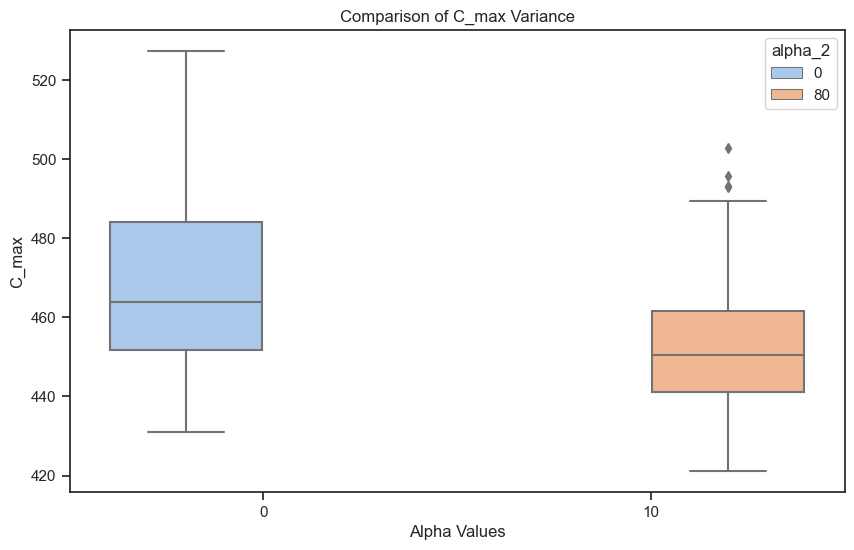

In [88]:
# 알파값이 0, 0, 100인 행과 10, 80, 10이면서 YT수가 60대인 행만 선택
selected_data = all_alpha_df[(all_alpha_df['alpha_1'] == 0) & (all_alpha_df['alpha_2'] == 0) & (all_alpha_df['alpha_3'] == 100) & (all_alpha_df['Number of YT'] == 60) |
                             ((all_alpha_df['alpha_1'] == 10) & (all_alpha_df['alpha_2'] == 80) & (all_alpha_df['alpha_3'] == 10) & (all_alpha_df['Number of YT'] == 60))]

# 상자 그림 생성
plt.figure(figsize=(10, 6))
sns.boxplot(x='alpha_1', y='C_max', hue='alpha_2', data=selected_data)
plt.title('Comparison of C_max Variance')
plt.xlabel('Alpha Values')
plt.ylabel('C_max')
plt.show()

c:\Users\USER\anaconda3\envs\hyeooi\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\USER\anaconda3\envs\hyeooi\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.3'` for same effect.
  warnings.warn(msg, FutureWarning)


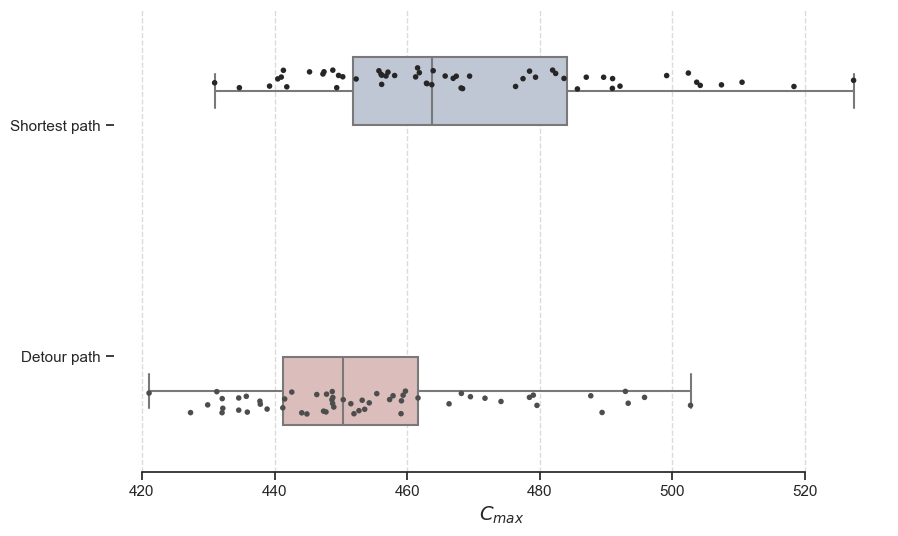

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select rows where alpha values match the conditions
selected_data = all_alpha_df[
    ((all_alpha_df['alpha_1'] == 0) & (all_alpha_df['alpha_2'] == 0) & (all_alpha_df['alpha_3'] == 100) & (all_alpha_df['Number of YT'] == 60)) |
    ((all_alpha_df['alpha_1'] == 10) & (all_alpha_df['alpha_2'] == 80) & (all_alpha_df['alpha_3'] == 10) & (all_alpha_df['Number of YT'] == 60))
]


# Map numeric x-axis ticks to labels
alpha_labels = {0: 'Shortest path', 10: 'Detour path'}
selected_data['alpha_1_labels'] = selected_data['alpha_1'].map(alpha_labels)

# Set the plot style
sns.set_theme(style="ticks")

# Create a horizontal boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='alpha_1_labels', x='C_max', hue='alpha_2', data=selected_data, dodge=True, palette="vlag", width=0.6, whis=[0, 100])

# Add in points to show each observation
sns.stripplot(y='alpha_1_labels', x='C_max', hue='alpha_2', data=selected_data, dodge=True, size=4, color=".3")

# Tweak the visual presentation
# plt.title('Comparison of C_max Variance')
plt.xlabel('$C_{max}$', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine(trim=True, left=True)

# Remove y-axis label
plt.ylabel('')
# Remove legend
plt.legend().set_visible(False)

# Show the plot
plt.show()

In [90]:
# # gamma combination visualization
# folder_path = 'gamma_combination'
# y_col = ['C_max_prev', 'C_max_now', 'C_max', 'Congestion_ratio_AVG', 'Congestion_ratio_AVG_prev', 'Congestion_ratio_AVG_now']

# original_df = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier = y_col[2])

# original_df = f.to_numeric(original_df, y_col[0])
# original_df = f.to_numeric(original_df, y_col[1])
# original_df = f.to_numeric(original_df, y_col[3])
# original_df_30s = f.to_numeric(original_df, y_col[4])
# original_df = f.to_numeric(original_df, y_col[5])

# for file_name, df in original_df:
#     # add column
#     df['Number of YT'] = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])

# gamma_combination = pd.DataFrame()

# # original_df에 있는 모든 파일을 합쳐 하나의 df로 만들기
# for file_name, df in original_df:
#     gamma_combination = pd.concat([gamma_combination, df], ignore_index=True)

# gamma_combination

In [91]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# correlation_data csv를 불러옴
correlation_data = pd.read_csv('C:\\Users\\USER\\workspace\\TSB\\Model\\correlation_data_all.csv')

# File_name값에 'prev'가 포함되면 Timeline값을 'prev'로 변경
correlation_data.loc[correlation_data['File_name'].str.contains('prev'), 'Timeline'] = 'prev'

# File_name값에 'post'가 포함되면 Timeline값을 'post'로 변경
correlation_data.loc[correlation_data['File_name'].str.contains('now'), 'Timeline'] = 'now'

correlation_data

,File_name,Type,Objective_value,C_max,C_avg,Timeline
0,prev_Truck_20_LP_0_0_100_1rep.csv,Min,63800,427.120,384.7000,prev
1,now_Truck_20_LP_0_0_100_1rep.csv,Min,68000,436.192,390.1900,now
2,prev_Truck_20_LP_40_50_10_1rep.csv,Min,34751,413.552,382.6468,prev
3,now_Truck_20_LP_40_50_10_1rep.csv,Min,34924,451.584,394.8568,now
4,prev_Truck_20_LP_0_0_100_1rep.csv,Middle,98400,466.880,428.1868,prev
...,...,...,...,...,...,...
235,now_Truck_20_LP_40_50_10_20rep.csv,Middle,48319,458.872,421.6148,now
236,prev_Truck_20_LP_0_0_100_20rep.csv,Max,112800,490.896,439.8356,prev
237,now_Truck_20_LP_0_0_100_20rep.csv,Max,115600,490.912,435.9680,now
238,prev_Truck_20_LP_40_50_10_20rep.csv,Max,59834,480.576,437.9800,prev


In [92]:
# 특정 폴더 경로 설정 (본인의 실제 경로로 수정해주세요)
root_folder = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results\\Correlation_cost_completiontime'

# 결과를 저장할 리스트 초기화
result_data = []

# root_folder 안의 모든 서브폴더에 대해 순회
for folder_name in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder_name)

    # 서브폴더인 경우에만 처리
    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder_path}")

        # 서브폴더 안의 모든 CSV 파일에 대해 순회
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(folder_path, file_name)

                # CSV 파일을 데이터프레임으로 읽어옴
                df = pd.read_csv(file_path)

                # 파일명과 'Congestion_ratio_AVG_prev', 'Congestion_ratio_AVG_now', 'Congestion_ratio_AVG' 행의 1번째 값을 변수로 저장
                file_name_variable = file_name
                avg_prev_variable = df.at[0, 'Congestion_ratio_AVG_prev']
                avg_now_variable = df.at[0, 'Congestion_ratio_AVG_now']
                avg_variable = df.at[0, 'Congestion_ratio_AVG']

                # 'min', 'middle', 'max' 중 어떤 것이 포함되어 있는지 확인하여 'Type' 열에 추가
                folder_type = None
                if 'min' in folder_name.lower():
                    folder_type = 'Min'
                elif 'middle' in folder_name.lower():
                    folder_type = 'Middle'
                elif 'max' in folder_name.lower():
                    folder_type = 'Max'

                # 결과를 리스트에 추가
                result_data.append({
                    'File_name': file_name_variable,
                    'Congestion_ratio_AVG_prev': avg_prev_variable,
                    'Congestion_ratio_AVG_now': avg_now_variable,
                    'Congestion_ratio_AVG': avg_variable,
                    'Type': folder_type
                })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(result_data)

# 결과 출력
result_df


Processing folder: C:\Users\USER\workspace\TSB\Simulation\Assets\Results\Correlation_cost_completiontime\prev_20_now_20_max
Processing folder: C:\Users\USER\workspace\TSB\Simulation\Assets\Results\Correlation_cost_completiontime\prev_20_now_20_middle
Processing folder: C:\Users\USER\workspace\TSB\Simulation\Assets\Results\Correlation_cost_completiontime\prev_20_now_20_min


,File_name,Congestion_ratio_AVG_prev,Congestion_ratio_AVG_now,Congestion_ratio_AVG,Type
0,result_prev_RoutePoints_20_LP_0_0_100_10rep.cs...,0.155864,0.183358,0.169611,Max
1,result_prev_RoutePoints_20_LP_0_0_100_11rep.cs...,0.143232,0.163911,0.153572,Max
2,result_prev_RoutePoints_20_LP_0_0_100_12rep.cs...,1.063896,0.449031,0.756463,Max
3,result_prev_RoutePoints_20_LP_0_0_100_13rep.cs...,0.229776,0.174711,0.202243,Max
4,result_prev_RoutePoints_20_LP_0_0_100_14rep.cs...,0.214199,0.174683,0.194441,Max
...,...,...,...,...,...
115,result_prev_RoutePoints_20_LP_40_50_10_5rep.cs...,0.112903,0.137246,0.125075,Min
116,result_prev_RoutePoints_20_LP_40_50_10_6rep.cs...,0.156535,0.080810,0.118673,Min
117,result_prev_RoutePoints_20_LP_40_50_10_7rep.cs...,0.171467,0.136599,0.154033,Min
118,result_prev_RoutePoints_20_LP_40_50_10_8rep.cs...,0.165916,0.160230,0.163073,Min


In [93]:
# 'File_name'의 앞 7글자를 제외한 값을 '_with_'를 기준으로 앞뒤로 분리하여 새로운 행을 만듦
result_df_split1 = result_df.copy()
result_df_split2 = result_df.copy()


result_df_split1['File_name'] = result_df['File_name'].str[7:]
result_df_split2['File_name'] = result_df['File_name'].str[7:]


# 'File_name'안의 모든 'RoutePoints'라는 글자는 'Truck'으로 변환
result_df_split1['File_name'] = result_df_split1['File_name'].str.replace('RoutePoints', 'Truck')
result_df_split2['File_name'] = result_df_split2['File_name'].str.replace('RoutePoints', 'Truck')

# 'File_name'열의 '_with_'까지의 값을 다 지우고 남은 값을 'File_name'열에 저장
result_df_split1['File_name'] = result_df_split1['File_name'].str.split('_with_').str[0]

# '_with_' 뒤부터 끝까지의 값을 'File_name'열에 저장
result_df_split2['File_name'] = result_df_split2['File_name'].str.split('_with_').str[1]

# 합치기
result_df_split = pd.concat([result_df_split1, result_df_split2])


df = result_df_split.copy()
prev_df = df[df['File_name'].str.startswith('prev')]
prev_df['Congestion_ratio_AVG'] = prev_df['Congestion_ratio_AVG_prev']

# File_name이 'now'로 시작하는 경우
now_df = df[df['File_name'].str.startswith('now')]
now_df['Congestion_ratio_AVG'] = now_df['Congestion_ratio_AVG_now']

# Concatenate 두 데이터프레임
result_df_split = pd.concat([prev_df, now_df], ignore_index=True)

# Congestion_ratio_AVG_prev	Congestion_ratio_AVG_now 열 삭제
result_df_split = result_df_split.drop(['Congestion_ratio_AVG_prev', 'Congestion_ratio_AVG_now'], axis=1)

result_df_split


c:\Users\USER\anaconda3\envs\hyeooi\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\USER\anaconda3\envs\hyeooi\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,File_name,Congestion_ratio_AVG,Type
0,prev_Truck_20_LP_0_0_100_10rep.csv,0.155864,Max
1,prev_Truck_20_LP_0_0_100_11rep.csv,0.143232,Max
2,prev_Truck_20_LP_0_0_100_12rep.csv,1.063896,Max
3,prev_Truck_20_LP_0_0_100_13rep.csv,0.229776,Max
4,prev_Truck_20_LP_0_0_100_14rep.csv,0.214199,Max
...,...,...,...
235,now_Truck_20_LP_40_50_10_5rep.csv,0.137246,Min
236,now_Truck_20_LP_40_50_10_6rep.csv,0.080810,Min
237,now_Truck_20_LP_40_50_10_7rep.csv,0.136599,Min
238,now_Truck_20_LP_40_50_10_8rep.csv,0.160230,Min


In [94]:
# correlation_data과 result_df_split을 File_name, Type을 기준으로 합침
correlation_data = pd.merge(correlation_data, result_df_split, on=['File_name', 'Type'])

correlation_data

,File_name,Type,Objective_value,C_max,C_avg,Timeline,Congestion_ratio_AVG
0,prev_Truck_20_LP_0_0_100_1rep.csv,Min,63800,427.120,384.7000,prev,0.220976
1,now_Truck_20_LP_0_0_100_1rep.csv,Min,68000,436.192,390.1900,now,0.207952
2,prev_Truck_20_LP_40_50_10_1rep.csv,Min,34751,413.552,382.6468,prev,0.170279
3,now_Truck_20_LP_40_50_10_1rep.csv,Min,34924,451.584,394.8568,now,0.251744
4,prev_Truck_20_LP_0_0_100_1rep.csv,Middle,98400,466.880,428.1868,prev,0.277137
...,...,...,...,...,...,...,...
235,now_Truck_20_LP_40_50_10_20rep.csv,Middle,48319,458.872,421.6148,now,0.147750
236,prev_Truck_20_LP_0_0_100_20rep.csv,Max,112800,490.896,439.8356,prev,0.224792
237,now_Truck_20_LP_0_0_100_20rep.csv,Max,115600,490.912,435.9680,now,0.158609
238,prev_Truck_20_LP_40_50_10_20rep.csv,Max,59834,480.576,437.9800,prev,0.190731


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

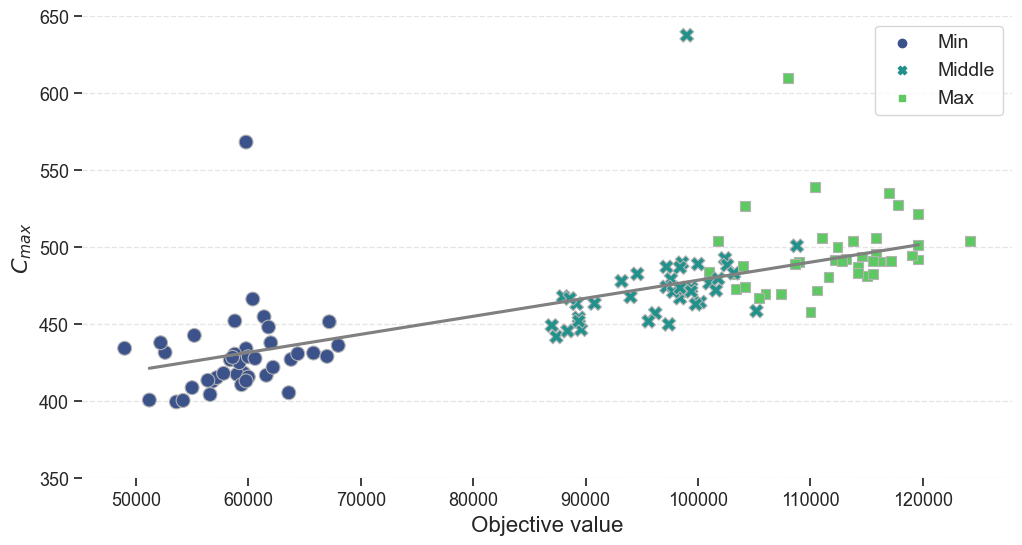

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = correlation_data.copy()

# Remove outliers for 'C_max'
filtered_data = df[df['File_name'].str.contains('_0_0_100')]

# Create a scatter plot with seaborn
plt.figure(figsize=(12, 6))

# Scatter plot with adjusted border line color
sns.scatterplot(data=filtered_data, x='Objective_value', y='C_max', hue='Type', style='Type', palette='viridis', s=100, edgecolor='0.7')

# Linear regression for the filtered dataset
X_filtered = filtered_data['Objective_value'].values.reshape(-1, 1)
y_filtered = filtered_data['C_max'].values.reshape(-1, 1)
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)
model_filtered = LinearRegression()
model_filtered.fit(X_train_filtered, y_train_filtered)

# Plotting the linear regression line for the filtered data
sns.regplot(x=X_test_filtered.flatten(), y=model_filtered.predict(X_test_filtered).flatten(), scatter=False, color='gray', label='_nolegend_')
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.ylim(350, 650)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.gca().xaxis.grid(False)

# Remove graph borders
sns.despine(left=True, bottom=True)

# plt.title('Correlation between Objective value and ${C_{max}}$ - Shortest path')
plt.xlabel('Objective value', fontsize=16)
plt.ylabel('${C_{max}}$', fontsize=16)
plt.legend(fontsize=14)
plt.show()


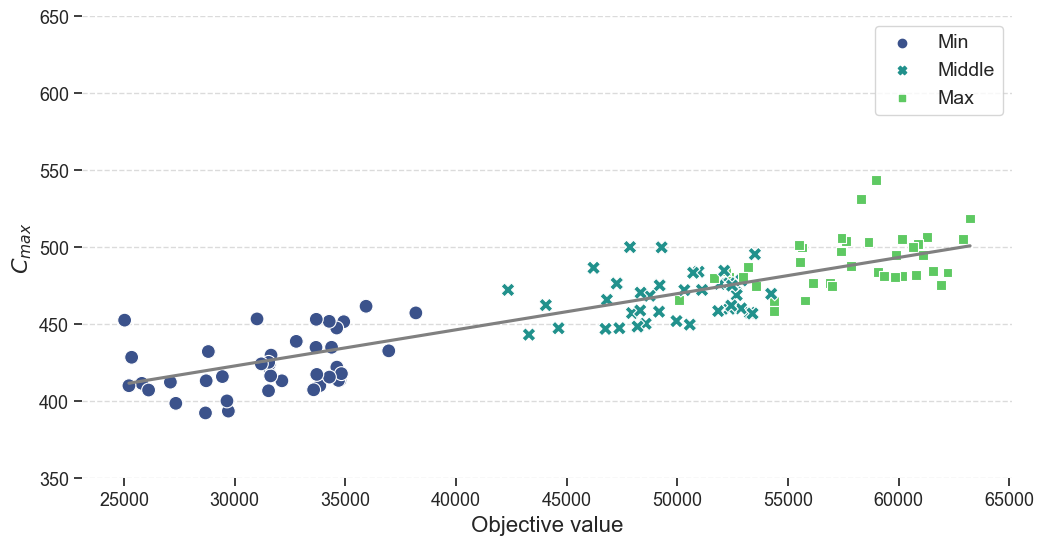

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = correlation_data.copy()

# Remove outliers for 'C_max'
filtered_data = df[df['File_name'].str.contains('_40_50_10')]

# Create a scatter plot with seaborn
plt.figure(figsize=(12, 6))

# Scatter plot
sns.scatterplot(data=filtered_data, x='Objective_value', y='C_max', hue='Type', style='Type', palette='viridis', s=100)

# Linear regression for the filtered dataset
X_filtered = filtered_data['Objective_value'].values.reshape(-1, 1)
y_filtered = filtered_data['C_max'].values.reshape(-1, 1)
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)
model_filtered = LinearRegression()
model_filtered.fit(X_train_filtered, y_train_filtered)

# Plotting the linear regression line for the filtered data
sns.regplot(x=X_test_filtered.flatten(), y=model_filtered.predict(X_test_filtered).flatten(), scatter=False, color='gray', label='_nolegend_')

# Set y-axis limits
plt.ylim(350, 650)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove graph borders
sns.despine(trim=True, bottom=True, left=True, right=True)  # Removed right border

# Remove horizontal grid lines
plt.gca().xaxis.grid(False)  # Removed horizontal grid lines

# Modify the font size of the x-axis and y-axis labels
plt.xlabel('Objective value', fontsize=16)
plt.ylabel('${C_{max}}$', fontsize=16)
plt.legend(fontsize=14)
plt.show()
